In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import  image_dataset_from_directory
from keras import models
from keras import layers
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [3]:
data_augmentation = models.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1, 0.2),
        layers.RandomTranslation(0.1, 0.1),
    ]
)

In [4]:
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Rescaling(1./255, input_shape=(150,150,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/jakubwasik/Documents/univeristy/machine-learning-2/.venv/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [10]:
train_dataset = image_dataset_from_directory(
    '/Users/jakubwasik/Documents/univeristy/machine-learning-2/main_directory/train',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150,150),
    shuffle=True
)

validation_dataset = image_dataset_from_directory(
    '/Users/jakubwasik/Documents/univeristy/machine-learning-2/main_directory/validation',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150,150),
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    '/Users/jakubwasik/Documents/univeristy/machine-learning-2/main_directory/test',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150,150),
    shuffle=True
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [11]:
history_binary = model.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.4873 - loss: 0.6945 - val_accuracy: 0.6090 - val_loss: 0.6849
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.5528 - loss: 0.6838 - val_accuracy: 0.5300 - val_loss: 0.6768
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - accuracy: 0.5944 - loss: 0.6708 - val_accuracy: 0.6030 - val_loss: 0.6515
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.6277 - loss: 0.6470 - val_accuracy: 0.6140 - val_loss: 0.6478
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.6434 - loss: 0.6363 - val_accuracy: 0.6330 - val_loss: 0.6322
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.6467 - loss: 0.6267 - val_accuracy: 0.6450 - val_loss: 0.6215
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.6655 - loss: 0.6078 - val_accuracy: 0.6570 - val_loss: 0.6060
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.6752 - loss: 0

In [12]:
history_binary_dict = history_binary.history

In [13]:
import numpy as np

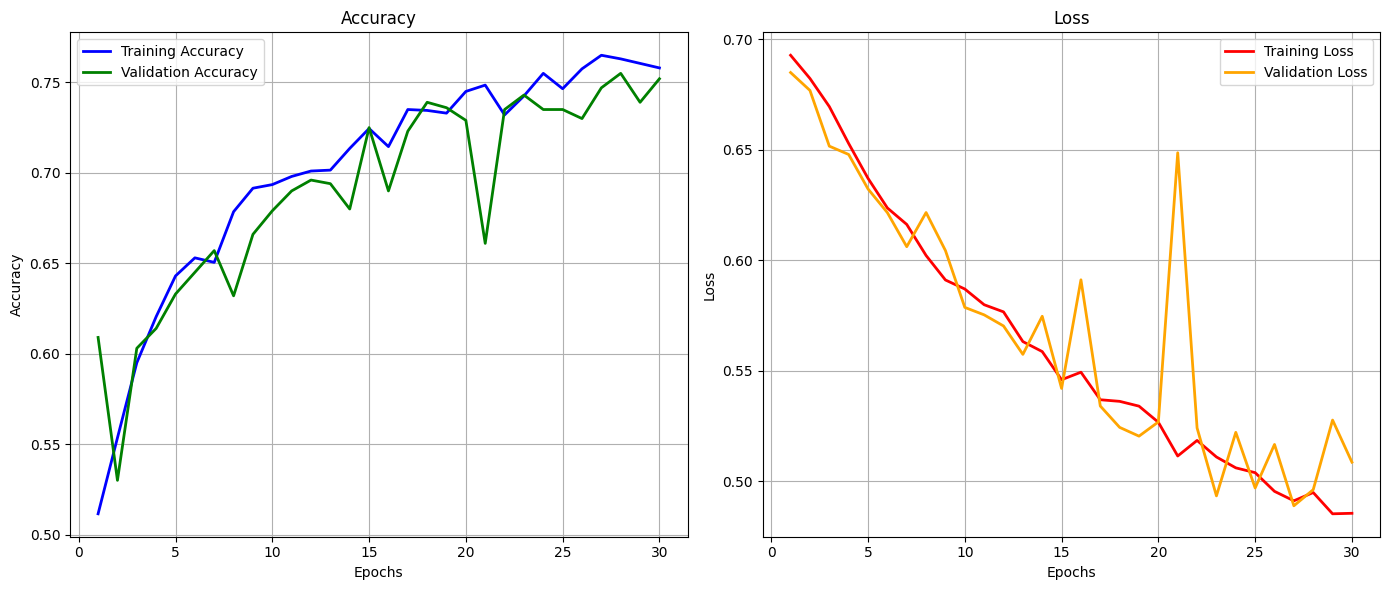

In [14]:
x_vector = np.linspace(1,len(history_binary_dict['accuracy']),len(history_binary_dict['accuracy']))

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
plt.plot(x_vector, history_binary_dict['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(x_vector, history_binary_dict['val_accuracy'], label='Validation Accuracy', color='green', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(x_vector, history_binary_dict['loss'], label='Training Loss', color='red', linewidth=2)
plt.plot(x_vector, history_binary_dict['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss')

plt.tight_layout() 
plt.show()

In [15]:
model_dropout = models.Sequential()
model_dropout.add(layers.Rescaling(1./255, input_shape=(150,150,3)))

model_dropout.add(layers.Conv2D(32, (3,3), activation='relu'))
model_dropout.add(layers.MaxPool2D((2,2)))
model_dropout.add(layers.Dropout(0.25))

model_dropout.add(layers.Conv2D(64, (3,3), activation='relu'))
model_dropout.add(layers.MaxPool2D((2,2)))
model_dropout.add(layers.Dropout(0.3))

model_dropout.add(layers.Conv2D(128, (3,3), activation='relu'))
model_dropout.add(layers.MaxPool2D((2,2)))
model_dropout.add(layers.Dropout(0.3))

model_dropout.add(layers.Conv2D(128, (3,3), activation='relu'))
model_dropout.add(layers.MaxPool2D((2,2)))
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dropout(0.5))

model_dropout.add(layers.Dense(512, activation='relu'))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(1, activation='sigmoid'))


/Users/jakubwasik/Documents/univeristy/machine-learning-2/.venv/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model_dropout.compile(optimizer=RMSprop(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [17]:
history_dropout = model_dropout.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.5115 - loss: 0.7154 - val_accuracy: 0.5330 - val_loss: 0.6928
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - accuracy: 0.5225 - loss: 0.6961 - val_accuracy: 0.4870 - val_loss: 0.6929
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step - accuracy: 0.5338 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.5397 - loss: 0.6901 - val_accuracy: 0.5180 - val_loss: 0.6922
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.5370 - loss: 0.6913 - val_accuracy: 0.5180 - val_loss: 0.6938
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.5607 - loss: 0.6819 - val_accuracy: 0.5310 - val_loss: 0.6884
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.5589 - loss: 0.6800 - val_accuracy: 0.5500 - val_loss: 0.6857
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 250ms/step - accuracy: 0.5698 - loss: 0

In [18]:
history_dropout_dict = history_dropout.history

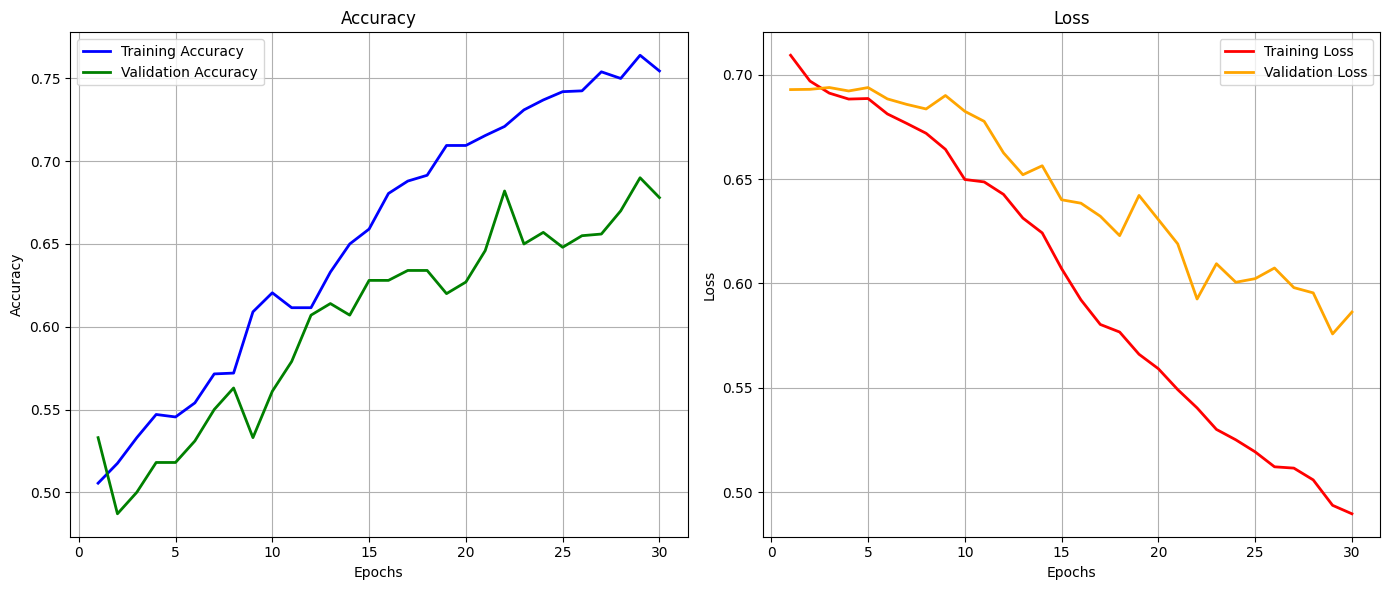

In [19]:
x_vector = np.linspace(1,len(history_dropout_dict['accuracy']),len(history_dropout_dict['accuracy']))

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
plt.plot(x_vector, history_dropout_dict['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(x_vector, history_dropout_dict['val_accuracy'], label='Validation Accuracy', color='green', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(x_vector, history_dropout_dict['loss'], label='Training Loss', color='red', linewidth=2)
plt.plot(x_vector, history_dropout_dict['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss')

plt.tight_layout() 
plt.show()